In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

- clean_data: mesmo que o feito antes, mas com normalização e padronização de dados
- clean_data_grouped: mesmo que clean_data, mas com valores com pouca frequencia agrupados e vou usar um metodo de redução de dimensionalidade

- clean_data_gender
- clean_data_alignment
- clean_data_publisher
- clean_data_grouped_gender
- clean_data__grouped_alignment
- clean_data_grouped_publisher

In [76]:
# Merged_data: Dados já integrados e valores "-99" e "-" tem valor NaN agora.
data = pd.read_csv("data/merged_data.csv")
data.head()

,hero_names,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,NaN,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,NaN,bad,NaN,...,False,False,False,False,False,False,False,False,False,False


In [77]:
# bool are superpowers, the rest is caracteristic
data.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('bool')], dtype=object)

In [78]:
data_objects = data.select_dtypes(include='O')
data_objects.head()

,hero_names,Gender,Eye color,Race,Hair color,Publisher,Skin color,Alignment
0,A-Bomb,Male,yellow,Human,No Hair,Marvel Comics,NaN,good
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,good
2,Abin Sur,Male,blue,Ungaran,No Hair,DC Comics,red,good
3,Abomination,Male,green,Human / Radiation,No Hair,Marvel Comics,NaN,bad
4,Abraxas,Male,blue,Cosmic Entity,Black,Marvel Comics,NaN,bad


In [79]:
data_objects.describe()

,hero_names,Gender,Eye color,Race,Hair color,Publisher,Skin color,Alignment
count,684,642,529,413,528,647,72,653
unique,667,2,22,60,29,24,16,3
top,Spider-Man,Male,blue,Human,Black,Marvel Comics,green,good
freq,3,464,208,195,151,341,21,435


In [80]:
data_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 8 columns):
hero_names    684 non-null object
Gender        642 non-null object
Eye color     529 non-null object
Race          413 non-null object
Hair color    528 non-null object
Publisher     647 non-null object
Skin color    72 non-null object
Alignment     653 non-null object
dtypes: object(8)
memory usage: 42.8+ KB


In [81]:
#poucos dados em skin color, então foi removido dos dados originais
clean_data = data.drop('Skin color', axis=1)
'Skin color' in (clean_data.columns)

False

## Analisar objetos separadamente

### Gender

In [82]:
data_objects.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

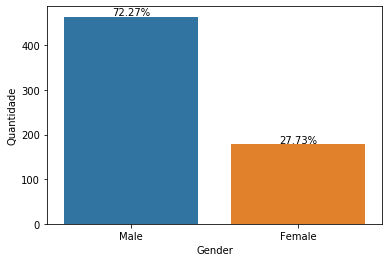

In [83]:
def barplot(x, data):
    ax = sns.countplot(x=x, data=data)
    total = data[x].count()
    ax.set(ylabel='Quantidade')
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format((height/total)*100),
                ha="center")
    plt.show()
barplot("Gender", data)

Opções para lidar com nan: (fazer isso depois, pois vai ter que criar dois tipos de dataset para esse)
- procurar no google o genero e adicionar manualmente
- mais frequente (male)
- para o dataset para prever o genero, remover as linhas com nan

### Eye color

In [84]:
data_objects['Eye color'].unique()

array(['yellow', 'blue', 'green', 'brown', nan, 'red', 'violet', 'white',
       'purple', 'black', 'silver', 'yellow / red', 'grey',
       'yellow (without irises)', 'gold', 'blue / white', 'hazel',
       'green / blue', 'white / red', 'indigo', 'amber', 'yellow / blue',
       'bown'], dtype=object)

In [85]:
clean_data = clean_data.replace('bown', 'brown')
clean_data['Eye color'].unique()

array(['yellow', 'blue', 'green', 'brown', nan, 'red', 'violet', 'white',
       'purple', 'black', 'silver', 'yellow / red', 'grey',
       'yellow (without irises)', 'gold', 'blue / white', 'hazel',
       'green / blue', 'white / red', 'indigo', 'amber', 'yellow / blue'],
      dtype=object)

In [86]:
eye_count = clean_data["Eye color"].value_counts()
eye_count

blue                       208
brown                      120
green                       71
red                         43
black                       21
yellow                      19
white                       16
hazel                        6
grey                         5
purple                       4
gold                         3
violet                       2
amber                        2
yellow (without irises)      2
white / red                  1
blue / white                 1
green / blue                 1
yellow / red                 1
silver                       1
indigo                       1
yellow / blue                1
Name: Eye color, dtype: int64

In [87]:
eye_count[eye_count < 15].index

Index(['hazel', 'grey', 'purple', 'gold', 'violet', 'amber',
       'yellow (without irises)', 'white / red', 'blue / white',
       'green / blue', 'yellow / red', 'silver', 'indigo', 'yellow / blue'],
      dtype='object')

In [88]:
clean_data_grouped = clean_data.copy()
clean_data_grouped = clean_data_grouped.replace(eye_count[eye_count < 10].index, "outros")
clean_data_grouped['Eye color'].unique()

array(['yellow', 'blue', 'green', 'brown', nan, 'red', 'outros', 'white',
       'black'], dtype=object)

In [89]:
clean_data['Eye color'].unique()

array(['yellow', 'blue', 'green', 'brown', nan, 'red', 'violet', 'white',
       'purple', 'black', 'silver', 'yellow / red', 'grey',
       'yellow (without irises)', 'gold', 'blue / white', 'hazel',
       'green / blue', 'white / red', 'indigo', 'amber', 'yellow / blue'],
      dtype=object)

In [90]:
clean_data['Eye color'].fillna(clean_data['Eye color'].mode()[0], inplace=True)
clean_data_grouped['Eye color'].fillna(clean_data_grouped['Eye color'].mode()[0], inplace=True)

### Race

In [91]:
race_count = clean_data["Race"].value_counts()
race_count

Human                 195
Mutant                 62
God / Eternal          14
Cyborg                 11
Human / Radiation      11
Android                 9
Symbiote                8
Kryptonian              7
Alien                   7
Demon                   6
Atlantean               5
Alpha                   5
Asgardian               5
Cosmic Entity           4
Inhuman                 4
Human / Altered         3
New God                 3
Animal                  3
Saiyan                  2
Eternal                 2
Frost Giant             2
Human-Kree              2
Demi-God                2
Human / Cosmic          2
Vampire                 2
Metahuman               2
Amazon                  2
Icthyo Sapien           1
Czarnian                1
Rodian                  1
Martian                 1
Clone                   1
Zombie                  1
Maiar                   1
Yoda's species          1
Human-Vulcan            1
Zen-Whoberian           1
Mutant / Clone          1
Korugaran   

In [92]:
clean_data.loc[clean_data['Race']=='Human / Clone']

,hero_names,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
117,Boba Fett,Male,brown,Human / Clone,Black,183.0,George Lucas,bad,NaN,True,...,False,False,False,False,False,False,False,False,False,False


Idea de agrupamento
- Juntar todos os que tem human no nome da raça
- agrupar raças mais similares (gorilla e animal, mutant e metahuman)
- pegar os menores e agrupar

In [95]:
clean_data_grouped = clean_data_grouped.replace(race_count[race_count < 15].index, "outros")
clean_data_grouped['Race'].unique()

array(['Human', 'outros', nan, 'Mutant'], dtype=object)

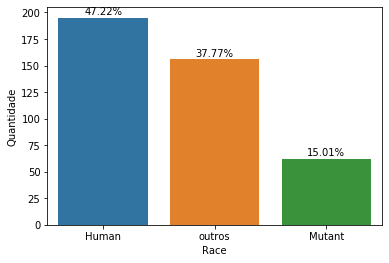

In [96]:
barplot('Race', clean_data_grouped)

In [97]:
clean_data['Race'].fillna(clean_data['Race'].mode()[0], inplace=True)
clean_data_grouped['Race'].fillna(clean_data_grouped['Race'].mode()[0], inplace=True)

### Hair color

In [98]:
hair_count = clean_data["Hair color"].value_counts()
hair_count

Black               151
Blond                88
Brown                82
No Hair              69
Red                  49
White                22
Auburn               13
Green                 8
Strawberry Blond      6
Purple                5
Brown / White         4
Silver                4
Grey                  4
Blue                  3
black                 3
blond                 3
Orange                2
Pink                  1
Gold                  1
Brown / Black         1
Yellow                1
Black / Blue          1
Magenta               1
Orange / White        1
Red / White           1
Brownn                1
Red / Grey            1
Indigo                1
Red / Orange          1
Name: Hair color, dtype: int64

In [99]:
clean_data = clean_data.replace(['Brownn', 'black', 'blond'], ['Brown', 'Black', 'Blond'])
clean_data_grouped = clean_data_grouped.replace(['Brownn', 'black', 'blond'], ['Brown', 'Black', 'Blond'])

In [100]:
clean_data_grouped = clean_data_grouped.replace(hair_count[hair_count < 15].index, "outros")
clean_data_grouped['Hair color'].unique()

array(['No Hair', 'Black', 'Blond', 'Brown', nan, 'White', 'outros',
       'Red'], dtype=object)

In [101]:
clean_data['Hair color'].fillna(clean_data['Hair color'].mode()[0], inplace=True)
clean_data_grouped['Hair color'].fillna(clean_data_grouped['Hair color'].mode()[0], inplace=True)

### Publisher

In [102]:
publisher_count = clean_data["Publisher"].value_counts()
publisher_count

Marvel Comics        341
DC Comics            196
NBC - Heroes          18
Dark Horse Comics     18
Image Comics          14
George Lucas          13
Star Trek              6
SyFy                   5
Team Epic TV           5
IDW Publishing         4
ABC Studios            4
Shueisha               4
Icon Comics            4
HarperCollins          3
Wildstorm              3
South Park             1
Sony Pictures          1
Hanna-Barbera          1
Universal Studios      1
Microsoft              1
J. K. Rowling          1
Rebellion              1
J. R. R. Tolkien       1
Titan Books            1
Name: Publisher, dtype: int64

Como se prever algo que aparece só uma vez???
Ele vai aparecer no treino, mas não no teste, ou o contrario.
Opção
- Remover
- Juntar e chamar de outros

### Alignment

In [103]:
alignment_count = clean_data["Alignment"].value_counts()
alignment_count

good       435
bad        194
neutral     24
Name: Alignment, dtype: int64

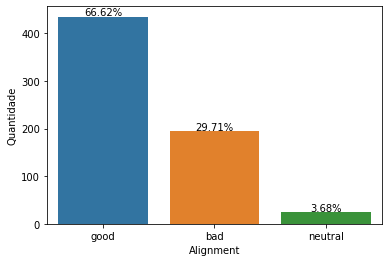

In [104]:
barplot('Alignment', clean_data)

## Dados numericos 

In [105]:
data_float = clean_data.select_dtypes(include='float64')
data_float.head()

,Height,Weight
0,203.0,441.0
1,191.0,65.0
2,185.0,90.0
3,203.0,441.0
4,NaN,NaN


In [106]:
data_float.describe()

,Height,Weight
count,490.000000,468.000000
mean,187.237755,113.651709
std,60.576189,106.505504
min,15.200000,2.000000
25%,173.500000,61.000000
50%,183.000000,81.000000
75%,190.250000,106.500000
max,975.000000,900.000000


In [107]:
data_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 2 columns):
Height    490 non-null float64
Weight    468 non-null float64
dtypes: float64(2)
memory usage: 10.8 KB


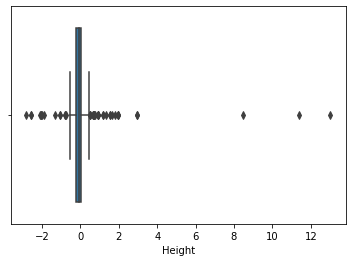

In [117]:
ax = sns.boxplot(x=clean_data["Height"])

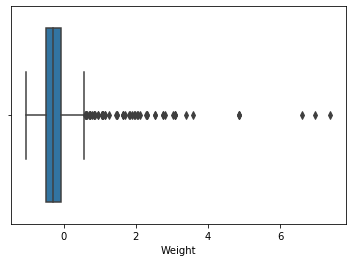

In [116]:
ax = sns.boxplot(x=clean_data["Weight"])

In [115]:
# Eu deveria standarizar tudo ou apenas os dados de treino? 
#Acho que deve usar o fit no treino e transformar treino e teste
# Fazer isso quando treinar
"""from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_float)
clean_data[["Height", 'Weight']] = scaler.transform(data_float)"""


## Redução de dimensionalidade